In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split

# Reading Tweets Dataset

In [4]:
Df_tweets=pd.read_csv(r'C:\\Users\\SRAVAN NEELI\\Desktop\\DAIICT\\Data Mining\\Tweets.csv')
Df_tweets.head()
Df_tweets.shape

(14640, 15)

# Tweet_coord attribute,negativereason_gold and airline_sentiment_gold are redudant in the dataset which are of no use for processing the data

In [5]:
del Df_tweets['tweet_coord']
del Df_tweets['airline_sentiment_gold']
del Df_tweets['negativereason_gold']

In [6]:
'''The tweets collected were for six major US Airlines that are 
        1.United
        2.U.S.Airways
        3.Southwest
        4.Delta
        5.Virgin America
        6.American'''
Df_tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [7]:
'''Now we consider the Label field of the data set which refers whether the tweet is  POSITIVE ,NEUTRAL AND NEGATIVE'''
Label_count=Df_tweets['airline_sentiment'].value_counts()
Label_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Sentiments')

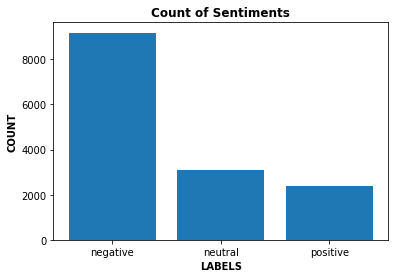

In [8]:
'''Visualising the Count of Labelled Data '''
Index = [1,2,3]
plt.bar(Index,Label_count)
plt.xticks(Index,['negative','neutral','positive'])
plt.ylabel('COUNT',fontweight='bold')
plt.xlabel('LABELS',fontweight='bold')
plt.title('Count of Sentiments',fontweight='extra bold')

# Preprocess data for classification

In [9]:
import re
import nltk
from nltk.corpus import stopwords

In [10]:
# In this function we are removing stop words, '@' '#' characters 
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [11]:
# In this function we are actually again doing cleaning and just measuring the length of the words
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [12]:
'''converting positive,neutral to 1 and negative to 0 by adding another column'''
Df_tweets['sentiment']=Df_tweets['airline_sentiment'].apply(lambda x: -1 if x=='negative' else 1)
Df_tweets['sentiment'].head()

0    1
1    1
2    1
3   -1
4   -1
Name: sentiment, dtype: int64

In [13]:
'''creating new column CLEAN_TWEET in which we store the cleaned tweets list of words'''
Df_tweets['clean_tweet']=Df_tweets['text'].apply(lambda x: tweet_to_words(x))
Df_tweets['clean_tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercials experienc...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: clean_tweet, dtype: object

In [14]:
Df_tweets['Tweet_length']=Df_tweets['text'].apply(lambda x: clean_tweet_length(x))
Df_tweets['Tweet_length'].head()

0     3
1     6
2     8
3    11
4     5
Name: Tweet_length, dtype: int64

In [15]:
train,test = train_test_split(Df_tweets,test_size=0.2,random_state=42)

In [16]:
''' Making list of all tweets,each member of the list is cleaned tweet '''
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)

In [17]:
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
train_features = tfidf.fit_transform(train_clean_tweet)
test_features=tfidf.fit_transform(test_clean_tweet)

In [19]:
def svm_function(x,y):
        #initilizing weight
        w = np.zeros(len(x[0]))
         #initialize learning rate
        l_rate = 1
         #epoch
        epoch = 10000
         #output list
        out = []
         #training svm
        for e in range(epoch):
            print(e)
            for i, val in enumerate(x):
                val1 = np.dot(x[i], w)
                if (y[i]*val1 < 1):
                     w = w + l_rate * ((y[i]*x[i]) - (2*(1/epoch)*w))
                else:
                     w = w + l_rate * (-2*(1/epoch)*w)
        for i, val in enumerate(x):
             out.append(np.dot(x[i], w))
        return w, out

In [20]:
#w,out=svm_function(train_features.toarray(),np.array(train['sentiment']))

In [21]:
train_features

<11712x11919 sparse matrix of type '<class 'numpy.float64'>'
	with 113748 stored elements in Compressed Sparse Row format>

In [22]:
test_features.shape

(2928, 5298)

In [46]:
#train_features=train_features.toarray()
test_features=test_features.toarray()

In [48]:
index = list(range(len(test_features[0,:]),len(train_features[0,:])))
len(index)

6621

In [49]:
w=np.load(r'C:\Users\SRAVAN NEELI\Desktop\DAIICT\Data Mining\weights.npy')
w.shape

(11919,)

In [51]:
w=np.delete(w,index)

In [52]:
w=w.reshape(len(w),1)

In [53]:
w.shape

(5298, 1)

In [54]:
predictions=[]
for i in range(len(test_features[:,0])):
    t=test_features[i,:]
    t=t.reshape(len(t),1)
    y_pred=np.dot(w.T,t)
    if(y_pred > 1):
        predictions.append(1)
    else:
        predictions.append(-1)    

In [84]:
from sklearn.metrics import accuracy_score
accuracy_without_library=accuracy_score(list(test['sentiment']),predictions)

In [56]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f,_=precision_recall_fscore_support(test['sentiment'],predictions,average='macro')

In [57]:
from sklearn.svm import SVC, LinearSVC, NuSVC

In [99]:
classifier=SVC(kernel="rbf", C=1, probability=True)

In [59]:
fit = classifier.fit(train_features,train['sentiment'])

In [68]:
x=np.zeros((2928,6621))

In [74]:
test_features=np.concatenate((test_features,x),axis=1)

In [76]:
pred = fit.predict(test_features)

In [78]:
accuracy_with_library=accuracy_score(list(test['sentiment']),pred)

In [82]:
label =['without_library','with_library']

In [85]:
count=[accuracy_without_library,accuracy_with_library]

In [86]:
index = np.arange(len(label))

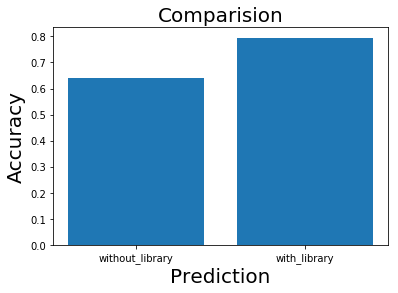

In [98]:

# this is for plotting purpose
index = np.arange(len(label))
plt.bar(index, count)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(index, label, fontsize=10)
plt.title('Comparision',fontsize=20)
plt.show()